In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
plt.rcParams['figure.figsize'] = (8,6)
from SVM import SVM
from sklearn.datasets import make_blobs

## Чтение и подготовка данных

In [238]:
data=pd.read_csv('breast-cancer.csv', sep=',')#Загрузка датасета для классификации

In [240]:
data=data.drop(['id'], axis=1)
data['diagnosis'].loc[data['diagnosis'] == 'M']=1
data['diagnosis'].loc[data['diagnosis'] == 'B']=-1
y=data[['diagnosis']].to_numpy().reshape(-1)
data=data.drop(['diagnosis'], axis=1)
data=data.drop(['radius_mean', 'area_mean', 'radius_mean', 'radius_worst', 'area_worst', 'perimeter_worst'], axis=1)
data=data.drop(['concavity_mean', 'concave points_mean', 'texture_worst'], axis=1)
data=data.drop(['area_se', 'perimeter_se', 'compactness_worst','concave points_worst'], axis=1)
data=data.drop(['smoothness_worst','concavity_worst'], axis=1)
X=data.to_numpy()

C:\Users\Ivan\AppData\Local\Temp\ipykernel_4864\1904586178.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data['diagnosis'].loc[data['diagnosis'] == 'M']=1
C:\Users\Ivan\AppData\Local\Temp\ipykernel_4864\1904586178.py:2: SettingWithCopy

In [111]:
def standartize_data(X):
    mins_x=np.min(X,axis=0)
    maxs_x=np.max(X,axis=0)
    X_st=(X-mins_x)/(maxs_x-mins_x)
    return X_st

In [113]:
X_st=standartize_data(X)

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X_st, y, test_size=0.3, random_state=24)

## Тестирование алгоритма

In [139]:
svm=SVM()

In [141]:
svm.fit(X_train,y_train,solution='linear',c=2)

Optimization terminated successfully    (Exit mode 0)
            Current function value: -128.21165333585287
            Iterations: 41
            Function evaluations: 16362
            Gradient evaluations: 41


In [142]:
svm.count_accuracy(X_test,y_test)

0.9239766081871345

In [153]:
svm_2=SVM()

In [155]:
svm_2.fit(X_train,y_train,solution='rbf',c=3)

Optimization terminated successfully    (Exit mode 0)
            Current function value: -181.05151269273847
            Iterations: 53
            Function evaluations: 21151
            Gradient evaluations: 53


In [156]:
svm_2.count_accuracy(X_test,y_test)

0.9824561403508771

In [193]:
svm_3=SVM()

In [195]:
svm_3.fit(X_train,y_train,solution='poly', d=3, c=3)

Optimization terminated successfully    (Exit mode 0)
            Current function value: -120.22191844738703
            Iterations: 55
            Function evaluations: 21959
            Gradient evaluations: 55


In [196]:
svm_3.count_accuracy(X_test,y_test)

0.9415204678362573

## Сравнение с эталонной реализацией

In [43]:
from sklearn.svm import SVC

In [202]:
svc_linear=SVC(kernel='linear', C=2)

In [204]:
svc_linear.fit(X_train,y_train.astype('int'))

SVC(C=2, kernel='linear')

In [206]:
pred=svc_linear.predict(X_test)

In [208]:
np.sum(pred==y_test)/len(y_test)

0.9766081871345029

In [210]:
svc_rbf=SVC(kernel='rbf', C=3)

In [212]:
svc_rbf.fit(X_train,y_train.astype('int'))

SVC(C=3)

In [214]:
pred=svc_rbf.predict(X_test)
np.sum(pred==y_test)/len(y_test)

0.9707602339181286

In [216]:
svc_poly=SVC(kernel='poly', C=3,degree=3,gamma=1)

In [218]:
svc_poly.fit(X_train,y_train.astype('int'))

SVC(C=3, gamma=1, kernel='poly')

In [220]:
pred=svc_poly.predict(X_test)
np.sum(pred==y_test)/len(y_test)

0.9707602339181286

## Визуализация решения

In [5]:
def visualise_svm(n_samples=500, solution='linear'):
    X, y = make_blobs(n_samples=n_samples, centers=2, random_state=0)
    y[np.where(y==0)]=-1
    clf = SVM()
    clf.fit(X[:int(0.6*n_samples)], y[:int(0.6*n_samples)], solution=solution)
    xx, yy = np.meshgrid(np.linspace(-10, 10, 500), np.linspace(-10, 10, 500))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z > 0, alpha=0.4, cmap='RdBu')
    plt.scatter(X[int(0.6*n_samples):, 0], X[int(0.6*n_samples):, 1], c=y[int(0.6*n_samples):], s=50, edgecolors='k')
    plt.title(f'Ядро: {solution}')
    plt.xlabel('Признак 1')
    plt.ylabel('Признак 2')
    plt.show()    

Optimization terminated successfully    (Exit mode 0)
            Current function value: -71.6505807511889
            Iterations: 22
            Function evaluations: 6626
            Gradient evaluations: 22


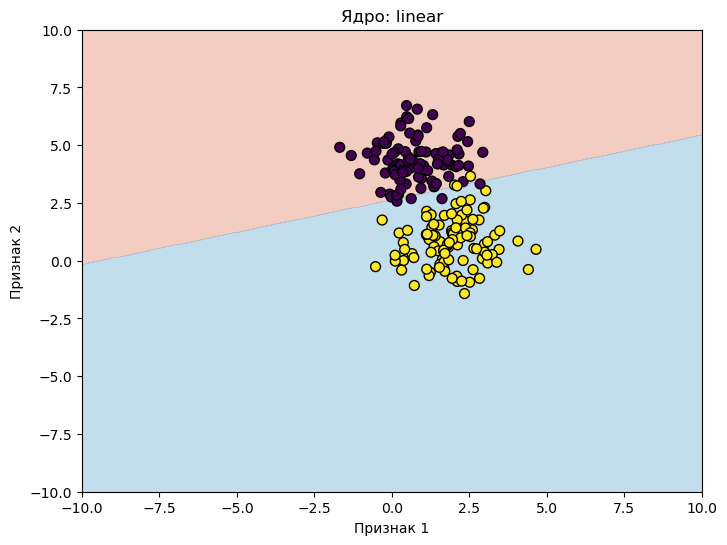

In [230]:
visualise_svm(n_samples=500, solution='linear')

Optimization terminated successfully    (Exit mode 0)
            Current function value: -65.84287460780936
            Iterations: 43
            Function evaluations: 12948
            Gradient evaluations: 43


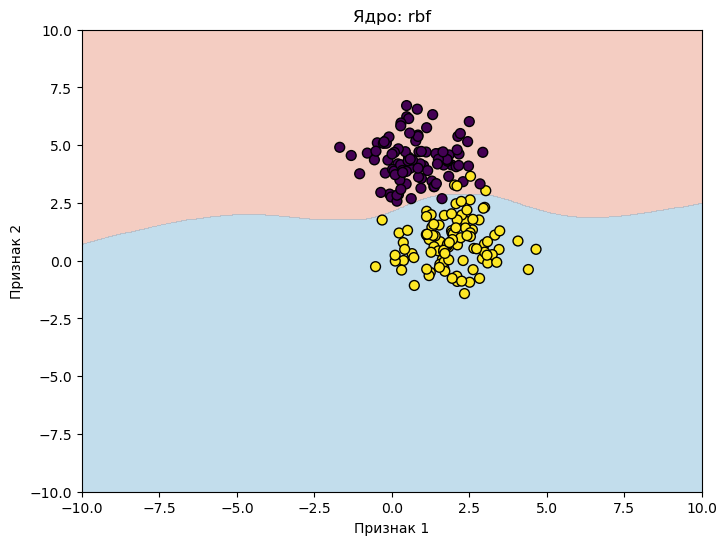

In [231]:
visualise_svm(n_samples=500, solution='rbf')

Optimization terminated successfully    (Exit mode 0)
            Current function value: -61.147415113388156
            Iterations: 30
            Function evaluations: 8747
            Gradient evaluations: 29


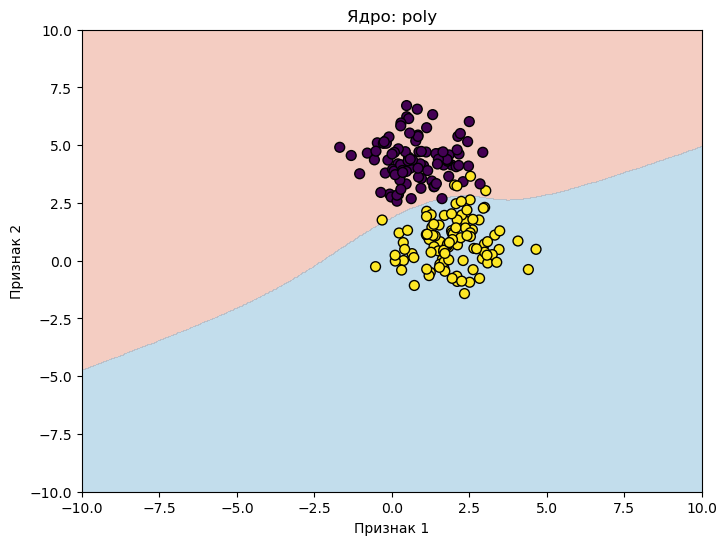

In [7]:
visualise_svm(n_samples=500, solution='poly')